# Splines cúbicos

In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

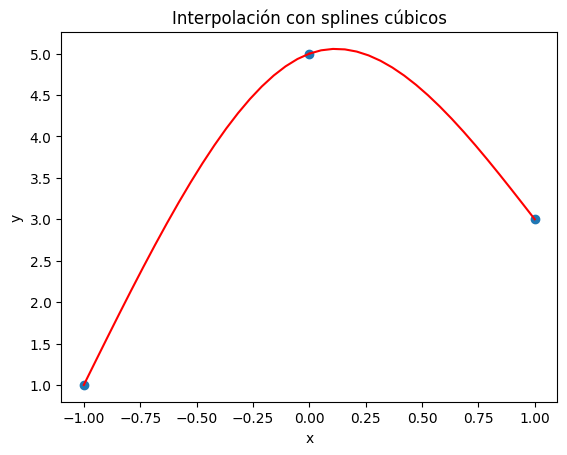

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

# Tarea
* Grafique los splines cúbicos tal que cumplan con una pendiente de $m=-3$ en los puntos dados.

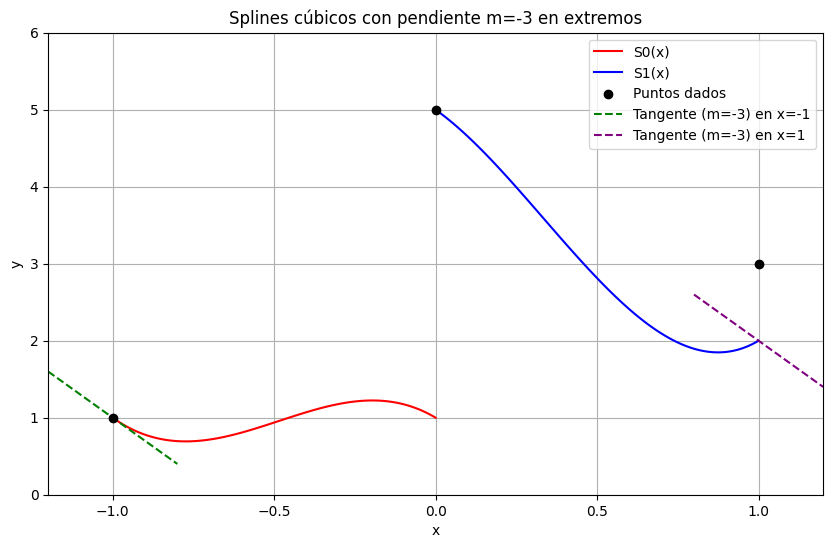

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Definición de los splines
def S0(x):
    return 1 - 3*(x + 1) + 8.5*(x + 1)**2 - 5.5*(x + 1)**3

def S1(x):
    return 5 - 3*x - 5.5*x**2 + 5.5*x**3

# Puntos para graficar los splines
x0 = np.linspace(-1, 0, 100)
x1 = np.linspace(0, 1, 100)

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar splines
plt.plot(x0, S0(x0), color='red', label='S0(x)')
plt.plot(x1, S1(x1), color='blue', label='S1(x)')

# Puntos dados
plt.scatter([-1, 0, 1], [1, 5, 3], color='black', label='Puntos dados', zorder=5)

# --- Agregar rectas tangentes para mostrar la pendiente m=-3 ---
# Tangente en x = -1 (usando S0)
x_tangent_left = np.linspace(-1.2, -0.8, 50)
y_tangent_left = S0(-1) - 3*(x_tangent_left + 1)  # Ecuación: y = y0 + m*(x - x0)
plt.plot(x_tangent_left, y_tangent_left, '--', color='green', label='Tangente (m=-3) en x=-1')

# Tangente en x = 1 (usando S1)
x_tangent_right = np.linspace(0.8, 1.2, 50)
y_tangent_right = S1(1) - 3*(x_tangent_right - 1)  # Ecuación: y = y0 + m*(x - x0)
plt.plot(x_tangent_right, y_tangent_right, '--', color='purple', label='Tangente (m=-3) en x=1')

# Ajustes visuales
plt.xlabel('x')
plt.ylabel('y')
plt.title('Splines cúbicos con pendiente m=-3 en extremos')
plt.legend()
plt.grid(True)
plt.axis([-1.2, 1.2, 0, 6])  # Ajustar rango para ver tangentes
plt.show()

In [6]:
# Coeficientes de los splines ajustados para m = -3
coef_S0 = {
    "a": 1,      # Término independiente
    "b": -3,     # Coeficiente de (x - x0)
    "c": 8.5,    # Coeficiente de (x - x0)^2
    "d": -5.5    # Coeficiente de (x - x0)^3
}

coef_S1 = {
    "a": 5,      # Término independiente
    "b": -3,     # Coeficiente de (x - x0)
    "c": -5.5,   # Coeficiente de (x - x0)^2
    "d": 5.5     # Coeficiente de (x - x0)^3
}

# Expresión de S0(x) (para x en [-1, 0])
def S0(x):
    x0 = -1  # Punto de referencia del spline S0
    return (coef_S0["d"] * (x - x0)**3 + 
            coef_S0["c"] * (x - x0)**2 + 
            coef_S0["b"] * (x - x0) + 
            coef_S0["a"])

# Expresión de S1(x) (para x en [0, 1])
def S1(x):
    x0 = 0  # Punto de referencia del spline S1
    return (coef_S1["d"] * (x - x0)**3 + 
            coef_S1["c"] * (x - x0)**2 + 
            coef_S1["b"] * (x - x0) + 
            coef_S1["a"])

# Imprimir las expresiones formateadas
print("S0(x) = {:.1f}(x + 1)^3 + {:.1f}(x + 1)^2 + {:.1f}(x + 1) + {:.1f}".format(
    coef_S0["d"], coef_S0["c"], coef_S0["b"], coef_S0["a"]))

print("S1(x) = {:.1f}x^3 + {:.1f}x^2 + {:.1f}x + {:.1f}".format(
    coef_S1["d"], coef_S1["c"], coef_S1["b"], coef_S1["a"]))

S0(x) = -5.5(x + 1)^3 + 8.5(x + 1)^2 + -3.0(x + 1) + 1.0
S1(x) = 5.5x^3 + -5.5x^2 + -3.0x + 5.0
